<a href="https://colab.research.google.com/gist/osvaldovega00/9dd215434ed78e4c1cac01ad96ac88fd/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI-Driven Equipment Maintenance - Exploratory Data Analysis

**Purpose:** Analyze the dataset to ensure it's suitable for an AI/ML solution for our project.

**Dataset Details:**

The dataset consists of 10,000 data points stored as rows with 8 features and 1 target in columns. UID: unique identifier ranging from 1 to 10000. Product-ID: consisting of a letter L, M, or H for low (50% of all products), medium (30%), and high (20%) as product quality variants and a variant-specific serial number. Air temperature [K], process temperature [K], rotational speed [rpm], Torque [Nm], tool wear [min] and a 'machine failure' label that indicates whether the machine has failed in this data point for any of the failure modes.

UCI Link: https://archive.ics.uci.edu/ml/datasets/AI4I+2020+Predictive+Maintenance+Dataset

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'AI4I 2020 Predictive Maintenance Dataset.csv'
df = pd.read_csv(file_path)
df.head()

Mounted at /content/drive


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [ ]:
df.shape

(10000, 10)

In [ ]:
df.isnull().sum()

,0
UDI,0
Product ID,0
Type,0
Air temperature [K],0
Process temperature [K],0
Rotational speed [rpm],0
Torque [Nm],0
Tool wear [min],0
Target,0
Failure Type,0


In [ ]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


The dataset does not contain null values, and the data matches the description.

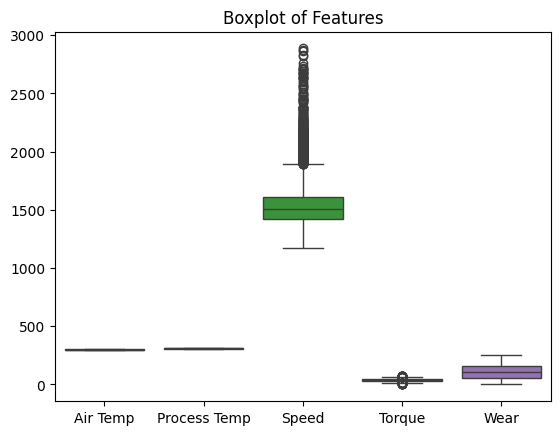

In [ ]:
#Create a box plot
df_shortened = df.rename(columns={'Air temperature [K]': 'Air Temp', 'Process temperature [K]': 'Process Temp', 'Rotational speed [rpm]': 'Speed', 'Torque [Nm]': 'Torque', 'Tool wear [min]': 'Wear'})
sns.boxplot(data=df_shortened[['Air Temp', 'Process Temp', 'Speed', 'Torque', 'Wear']])
plt.title('Boxplot of Features')
plt.show()

The boxplot visually show outlier values in the speed and torque parameters, there are 418 speed outliers & 69 torque outliers.

In [ ]:
#Speed outliers
feature = 'Rotational speed [rpm]'
Q1 = df[feature].quantile(0.25)
Q3 = df[feature].quantile(0.75)
IQR = Q3 - Q1
outliers = df[((df[feature] < (Q1 - 1.5 * IQR)) | (df[feature] > (Q3 + 1.5 * IQR)))]#.any(axis=1)]
print(outliers.shape[0])
outliers.head(10)

418


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
14,15,L47194,L,298.6,309.2,2035,19.6,40,0,No Failure
50,51,L47230,L,298.9,309.1,2861,4.6,143,1,Power Failure
70,71,M14930,M,298.9,309.0,1924,22.6,193,0,No Failure
101,102,L47281,L,298.8,308.8,1991,20.7,59,0,No Failure
155,156,H29569,H,298.4,308.2,1987,19.8,198,0,No Failure
172,173,M15032,M,298.1,308.0,1924,20.8,29,0,No Failure
177,178,L47357,L,298.2,308.2,1988,21.4,41,0,No Failure
194,195,M15054,M,298.2,308.5,2678,10.7,86,1,Power Failure
267,268,L47447,L,297.9,308.0,1954,21.1,42,0,No Failure
284,285,L47464,L,298.2,308.3,2051,19.2,90,0,No Failure


In [ ]:
#Torque outliers
feature = 'Torque [Nm]'
Q1 = df[feature].quantile(0.25)
Q3 = df[feature].quantile(0.75)
IQR = Q3 - Q1
outliers = df[((df[feature] < (Q1 - 1.5 * IQR)) | (df[feature] > (Q3 + 1.5 * IQR)))]#.any(axis=1)]
print(outliers.shape[0])
outliers.head(10)

69


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
50,51,L47230,L,298.9,309.1,2861,4.6,143,1,Power Failure
194,195,M15054,M,298.2,308.5,2678,10.7,86,1,Power Failure
380,381,L47560,L,297.5,308.3,2564,12.8,127,1,Power Failure
463,464,L47643,L,297.4,308.7,2874,4.2,118,1,Power Failure
603,604,L47783,L,297.9,309.8,1336,71.6,31,1,Power Failure
847,848,L48027,L,296.4,307.4,2833,5.6,213,1,Power Failure
880,881,M15740,M,295.8,306.3,1235,76.2,89,1,Power Failure
1016,1017,M15876,M,296.3,307.2,1319,68.3,24,1,Power Failure
1095,1096,L48275,L,296.9,307.5,2721,9.3,18,1,Power Failure
1124,1125,M15984,M,296.7,307.8,1258,69.0,105,1,Power Failure


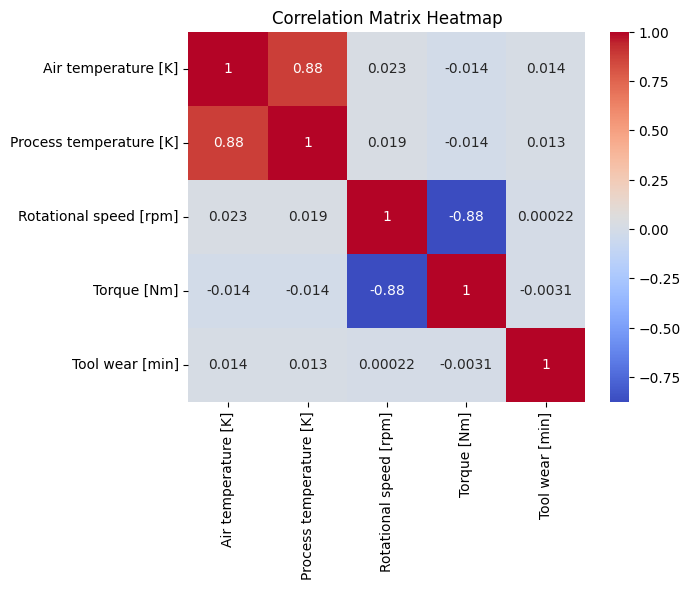

In [ ]:
# Compute correlation matrix of numerical variables
corr_value = df[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']].corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr_value, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

A strong positive linear relationship exists between:
- process temperature & air teperature

A strong negative linear relationship exist between:
- torque & rotational speed

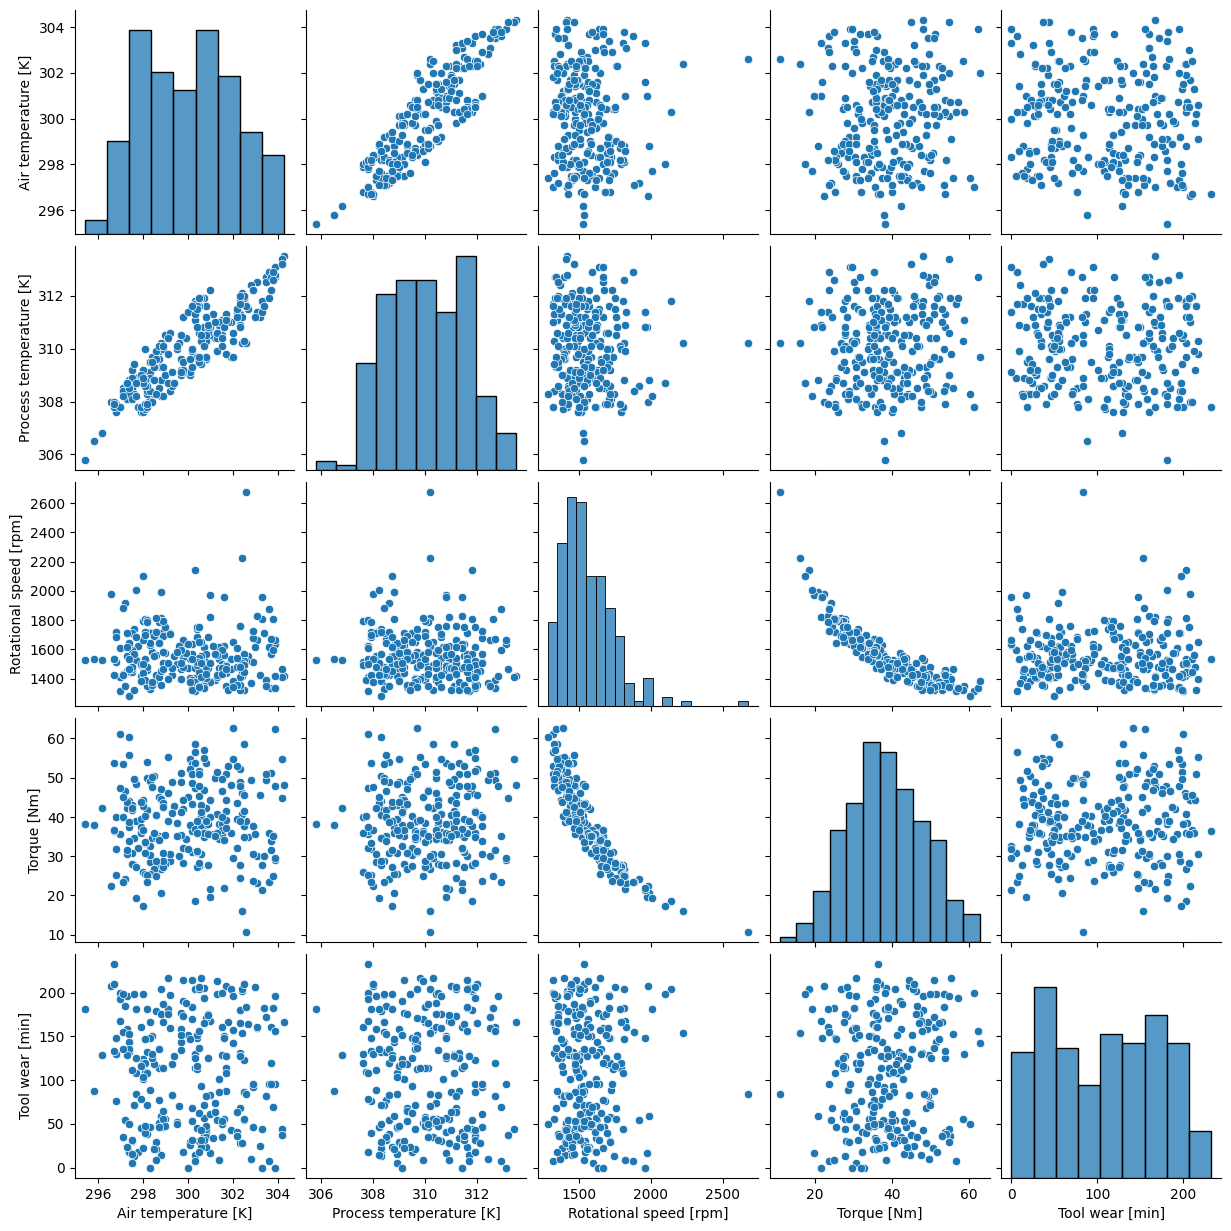

In [ ]:
# Create a scatter plot matrix of numerical variables.
df1 = df.sample(frac=0.025)
selected_columns = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
sns.pairplot(df1[selected_columns])
plt.show()

Analyze the proportion of failures, types of failures and see what are the feature statistics difference between no-failure cases vs failure cases.




In [ ]:
#Proportion of failures
failure_condition = df['Target'] == 1
failure_count = df[failure_condition].shape[0]
total_count = df.shape[0]
proportion_of_failures = failure_count / total_count
print(f'Proportion of failures: {proportion_of_failures:.2%}')

Proportion of failures: 3.39%


With a proportion of 3.39% failures out of 10,000 data points, ther dataset has a class imbalance.

A few ways to handle class imbalance:

Resampling Techniques:

Oversampling: Increase the number of failure instances by duplicating them. Techniques like SMOTE (Synthetic Minority Over-sampling Technique) can generate synthetic examples.


Undersampling: Decrease the number of non-failure instances to balance the classes. This can be risky if you lose important information.


Use of Appropriate Metrics: Instead of accuracy, focus on metrics like precision, recall, F1-score, and ROC-AUC that provide a better understanding of model performance on imbalanced data.


Algorithm Choice: Some algorithms handle imbalanced data better than others. Ensemble methods like Random Forest or Gradient Boosting can perform well in such cases.


Class Weight Adjustment: Many machine learning algorithms in scikit-learn have a parameter to adjust class weights, giving more importance to the minority class. For example, in Logistic Regression or Random Forest, you can set class_weight='balanced'.

In [ ]:
#Types of failures
failure_types = df['Failure Type'].unique()
print(failure_types)

['No Failure' 'Power Failure' 'Tool Wear Failure' 'Overstrain Failure'
 'Random Failures' 'Heat Dissipation Failure']


In [ ]:
#Feature Statistic Difference
failures = df[df['Target'] == 1]
no_failures = df[df['Target'] == 0]

failures = failures.drop(columns=['Target'])
no_failures = no_failures.drop(columns=['Target'])

failure_stats = failures.describe()
no_failure_stats = no_failures.describe()

print("Failure Cases Statistics:\n", failure_stats)
print("\nNo-Failure Cases Statistics:\n", no_failure_stats)

Failure Cases Statistics:
                UDI  Air temperature [K]  Process temperature [K]  \
count   339.000000           339.000000               339.000000   
mean   4647.722714           300.886431               310.290265   
std    2380.540041             2.071473                 1.363686   
min      51.000000           295.600000               306.100000   
25%    3555.000000           299.100000               309.500000   
50%    4442.000000           301.600000               310.400000   
75%    5971.000000           302.500000               311.200000   
max    9975.000000           304.400000               313.700000   

       Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  
count              339.000000   339.000000       339.000000  
mean              1496.486726    50.168142       143.781711  
std                384.943547    16.374498        72.759876  
min               1181.000000     3.800000         0.000000  
25%               1326.500000    45.950000        

Considerations:

What kind of cleaning steps were performed?
*   None, the data looks clean.

How did you deal with missing values?

*   The data does not contain missing values.

Were there outliers? If so, how did you handle them?

*   The boxplot visually show outlier values in the speed and torque parameters.
*   There are 418 speed outliers & 69 torque outliers.
*   The outlier values are true values that capture an error in target; therefore, they are a key part of the dataset. A model that is less suceptible to outliers will need to be used in order to achieve good accuracy.



If your dataset is too large to work with, does it make sense to build your prototype on a smaller subset of the data?

*   Dataset size is adequate and did not challenged the process time or memory resources needed.

Are there variables that are particularly significant? Are there strong correlations between pairs of independent variables or between an independent and dependent variable?


*   The relationship between the features and target are significant, and both positive and negative linear relationships exist based on the correlation matrix heatmap.


In conclusion the datasets looks to be suitable for the development of a predictive maintenance solution.